# USING AUTOGLUON TO ANALYZE AND PREDICT DEPRESSION RATES IN STUDENTS #

#### Autogluon is an open-source AutoML developed by Amazon Web Services. It automates Machine Learning tasks. It anticipates and handles model traing failure automatically. Autogluon fails far fewer than AutoML. ####

In [80]:
# install autogloun
!pip3 install -u pip
!pip3 install -u setuptools wheel
!pip install autogluon
!pip install --upgrade pip
!pip install -u -q -r requirements.txt


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such

In [81]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
df = pd.read_csv("student_depression_dataset_cleaned.csv")

In [83]:
df.head()

id  Gender  Age Age Group           City Profession  Academic Pressure  \
0   2    Male   33     Adult  Visakhapatnam    Student                  5   
1   8  Female   24     Adult      Bangalore    Student                  2   
2  26    Male   31     Adult       Srinagar    Student                  3   
3  30  Female   28     Adult       Varanasi    Student                  3   
4  32  Female   25     Adult         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

        Sleep Duration DietaryHabits                  Degrees Explained  \
0          '5-6 hours'       Healthy               Bachelor of Pharmacy   
1          '5-6 hours'      Moderate                Bachelor of Science   
2  'Less than 5 hours'       Healthy                   Bachelor of Arts   
3          '7-8 hours'      Moderate  Bachelor of Computer Applications   
4          '5-6 hours'      Moderate               Master of Technology   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0  B.Pharm                                   Yes                 3   
1      BSc                                    No                 3   
2       BA                                    No                 9   
3      BCA                                   Yes                 4   
4   M.Tech                                   Yes                 1   

  Financial Stress Family History of Mental Illness  Depression  
0                1                               No           1  
1                2                              Yes           0  
2                1                              Yes           0  
3                5                              Yes           1  
4                1                               No           0

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   Age Group                              27901 non-null  object 
 4   City                                   27901 non-null  object 
 5   Profession                             27901 non-null  object 
 6   Academic Pressure                      27901 non-null  int64  
 7   Work Pressure                          27901 non-null  int64  
 8   CGPA                                   27901 non-null  float64
 9   Study Satisfaction                     27901 non-null  int64  
 10  Job Satisfaction                       27901 non-null  int64  
 11  Sl

In [85]:
df.shape

(27901, 20)

In [86]:
df.describe()

id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.000000          0.000000          0.000000   
25%        6.290000            2.000000          0.000000          4.000000   
50%        7.770000            3.000000          0.000000          8.000000   
75%        8.920000            4.000000          0.000000         10.000000   
max       10.000000            5.000000          4.000000         12.000000   

         Depression  
count  27901.000000  
mean       0.585499  
std        0.492645  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [87]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Age Group                                0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
DietaryHabits                            0
Degrees Explained                        0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [88]:
# drop missing values
df_clean = df.dropna()

In [89]:
# duplicates
df_clean = df_clean.drop_duplicates()

In [90]:
# define the label or set variable target
label = 'Depression'

In [91]:
# split the data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# check
print('Train Data: ', train_data.shape)
print('Test Data: ', test_data.shape)

Train Data:  (22320, 20)
Test Data:  (5581, 20)


In [92]:
# train the autogluon model in the target model
predictor = TabularPredictor(label=label).fit(train_data, time_limit=1200, verbosity=2)

No path specified. Models will be saved in: "AutogluonModels/ag-20250517_055332"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.7
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.4.0: Fri Apr 11 18:33:46 PDT 2025; root:xnu-11417.101.15~117/RELEASE_ARM64_T8112
CPU Count:          8
Memory Avail:       1.49 GB / 8.00 GB (18.7%)
Disk Space Avail:   32.76 GB / 228.27 GB (14.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accurac

In [93]:
# check data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22320 entries, 13048 to 23654
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     22320 non-null  int64  
 1   Gender                                 22320 non-null  object 
 2   Age                                    22320 non-null  int64  
 3   Age Group                              22320 non-null  object 
 4   City                                   22320 non-null  object 
 5   Profession                             22320 non-null  object 
 6   Academic Pressure                      22320 non-null  int64  
 7   Work Pressure                          22320 non-null  int64  
 8   CGPA                                   22320 non-null  float64
 9   Study Satisfaction                     22320 non-null  int64  
 10  Job Satisfaction                       22320 non-null  int64  
 11  Sle

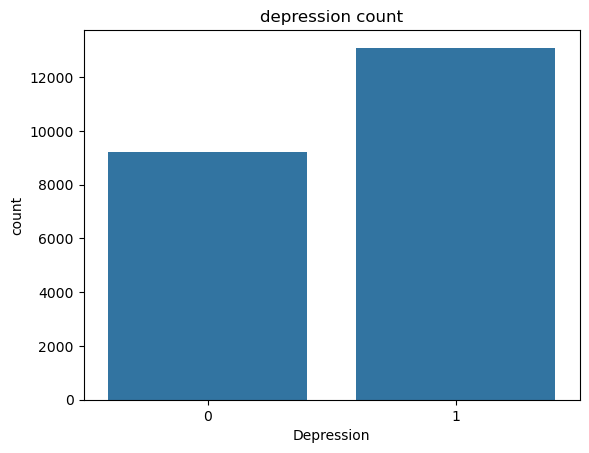

In [94]:
# check distribution
sns.countplot(x='Depression', data=train_data)
plt.title('depression count')
plt.show()

In [95]:
#Evaluate the model
predictor.evaluate(train_data)

{'accuracy': 0.9012096774193549,
 'balanced_accuracy': 0.8943594273011033,
 'mcc': 0.7954896101980515,
 'roc_auc': 0.9723401585478821,
 'f1': 0.9173135335808302,
 'precision': 0.9013928808313066,
 'recall': 0.9338066880439762}

In [96]:
# make predictions
predictions = predictor.predict(test_data)
predictions.head()

19981    0
16551    0
7640     0
21266    1
15759    0
Name: Depression, dtype: int64

In [97]:
# predict the probablity of the data
predictor.predict_proba(test_data).head()

0         1
19981  0.838316  0.161684
16551  0.740324  0.259675
7640   0.635068  0.364932
21266  0.060396  0.939604
15759  0.637802  0.362198

In [98]:
# To see the leaderboard of all models that AutoGluon trained and compare their performance
predictor.leaderboard(test_data, silent=True)

model  score_test  score_val eval_metric  pred_time_test  \
0              CatBoost    0.837843   0.859319    accuracy        0.021347   
1              LightGBM    0.836409   0.853495    accuracy        0.017102   
2   WeightedEnsemble_L2    0.836051   0.861111    accuracy        0.504489   
3               XGBoost    0.835872   0.857975    accuracy        0.012803   
4       NeuralNetFastAI    0.834259   0.848118    accuracy        0.079059   
5        NeuralNetTorch    0.831034   0.851703    accuracy        0.022181   
6        ExtraTreesGini    0.831034   0.849910    accuracy        0.123408   
7         LightGBMLarge    0.830676   0.850358    accuracy        0.031638   
8        ExtraTreesEntr    0.829959   0.849014    accuracy        0.219622   
9      RandomForestGini    0.828705   0.850806    accuracy        0.172056   
10     RandomForestEntr    0.827271   0.855735    accuracy        0.093409   
11           LightGBMXT    0.826913   0.850806    accuracy        0.010235   
12       KNeighborsDist    0.539151   0.560484    accuracy        0.025120   
13       KNeighborsUnif    0.528758   0.545699    accuracy        0.022762   

    pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0        0.003029   3.667930                 0.021347                0.003029   
1        0.004285   0.899007                 0.017102                0.004285   
2        0.204783  18.292345                 0.001484                0.000298   
3        0.005877   0.715868                 0.012803                0.005877   
4        0.018540   7.143952                 0.079059                0.018540   
5        0.015057  10.550746                 0.022181                0.015057   
6        0.049531   0.655247                 0.123408                0.049531   
7        0.011258   2.980565                 0.031638                0.011258   
8        0.037790   0.730890                 0.219622                0.037790   
9        0.040353   1.017730                 0.172056                0.040353   
10       0.090481   1.120263                 0.093409                0.090481   
11       0.002719   0.801430                 0.010235                0.002719   
12       0.015499   0.010766                 0.025120                0.015499   
13       0.016296   0.043352                 0.022762                0.016296   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            3.667930            1       True          7  
1            0.899007            1       True          4  
2            0.049971            2       True         14  
3            0.715868            1       True         11  
4            7.143952            1       True         10  
5           10.550746            1       True         12  
6            0.655247            1       True          8  
7            2.980565            1       True         13  
8            0.730890            1       True          9  
9            1.017730            1       True          5  
10           1.120263            1       True          6  
11           0.801430            1       True          3  
12           0.010766            1       True          2  
13           0.043352            1       True          1

# FEATURE IMPORTANCE #

In [99]:
# feature importance
importance = predictor.feature_importance(train_data)
importance.head()

Computing feature importance via permutation shuffling for 19 features using 5000 rows with 5 shuffle sets...
	50.11s	= Expected runtime (10.02s per shuffle set)
	15.42s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev       p_value  n  \
Have you ever had suicidal thoughts ?     0.13428  0.003833  7.958406e-08  5   
Academic Pressure                         0.10456  0.003315  1.210527e-07  5   
Financial Stress                          0.06276  0.005709  8.124360e-06  5   
Age                                       0.03112  0.003582  2.070035e-05  5   
DietaryHabits                             0.03020  0.003715  2.692777e-05  5   

                                       p99_high   p99_low  
Have you ever had suicidal thoughts ?  0.142172  0.126388  
Academic Pressure                      0.111385  0.097735  
Financial Stress                       0.074514  0.051006  
Age                                    0.038496  0.023744  
DietaryHabits                          0.037849  0.022551

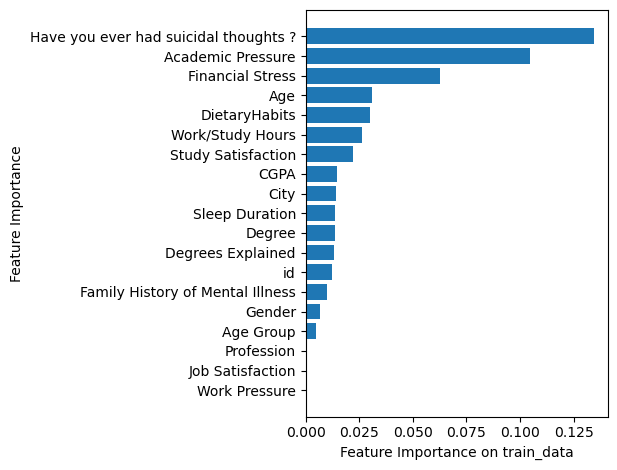

In [100]:
# plot feature importance
plt.barh(importance.index, importance['importance'])
plt.xlabel('Feature Importance on train_data')
plt.ylabel('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout() #automatically adjust the spacing of subplots in a figure so that everything fits without overlapping
plt.show()

# Evaluate the metrics of the models #

In [101]:
# Evaluate the model using metrics
y_true = test_data[label]
y_prediction = predictions

print('Classification Report: ', classification_report(y_true, y_prediction))
print('Confusion Matrix: ', confusion_matrix(y_true, y_prediction))

Classification Report:                precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix:  [[1828  515]
 [ 400 2838]]


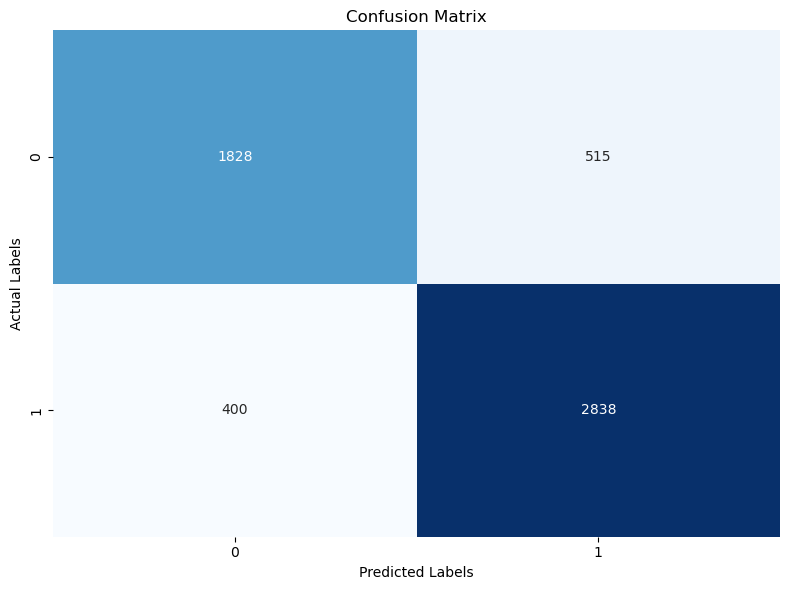

In [102]:
# plot or graph the model metrics actual vs. predicted
# Generate the confusion matrix
cm_graph = confusion_matrix(y_true, y_prediction)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_graph, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

## 🧠 Final Summary

In this project, we used AutoGluon to predict mental health outcomes based on survey data. We performed data preprocessing, feature engineering, model training, and evaluation. The best-performing model was chosen based on accuracy, and we visualized the results using a confusion matrix and feature importance plots.

### Key Outcomes:
- Accuracy: 90%
- Most important features:
        Have you ever had suicidal thoughts?,
        Academic Pressure,
        Financial Stress,
        Age,
        Dietary Habits
- Techniques used: AutoGluon, Random Forest, Feature Importance, Confusion Matrix

This project demonstrates a complete machine learning pipeline from raw data to meaningful insights.


# Save the file #

In [103]:
predictor.save("MentalHealthPredictorModel")